In [1]:
with open(r"DBScan_Dataset.txt", "r+") as f: file_data = f.readlines()
data = [[float(i) for i in line.strip().split("\t")] for line in file_data]
data = [tuple(data_point) for data_point in data]
import math
distances = {i:[math.sqrt(((j[0]-i[0])*(j[0]-i[0]))+((j[1]-i[1])*(j[1]-i[1])))for j in data] for i in data}

In [2]:
def checking_point(data_point,class_number,neighbours,info, new_classification, from_number = 0, minpts = 5, eps= 1.5):
    if info[data_point][1] == 0:
        info[data_point][1] =1
        list_of_neighbours = []
        t= 0
        for distance in distances[data_point]:
            if distance < eps:
                list_of_neighbours.append(data[t])
            t=t+1
        neighbours[data_point] = list_of_neighbours
        if minpts < len(list_of_neighbours):
            info[data_point][0] = class_number #class which they belong to

            if class_number in new_classification:
                new_classification[class_number].add(data_point)
            else:
                new_classification[class_number] = {data_point}
            
            for point in list_of_neighbours:
                checking_point(point,class_number,neighbours = neighbours,info=info, new_classification = new_classification, from_number = 1, minpts=minpts, eps=eps)
            return 1
        if len(list_of_neighbours) <= minpts and from_number == 1:
            info[data_point][0] = class_number #class which they belong to
            info[data_point][1] = 2 #indicates that they are boundary points
            new_classification[class_number].add(data_point)
    return 0


In [3]:
def give_accuracy(minpts, eps):

    neighbours = {}
    new_classification = {} #classification is also mentioned over here
    info = {i:[-1,0] for i in data} 
    class_number = 1
    
    for data_point in data:
        class_number = class_number + checking_point(data_point,class_number,neighbours = neighbours,info=info, new_classification = new_classification, from_number = 0, minpts=minpts, eps=eps)
    p = 0
    
    for i in data:
        if i[2] == info[i][0]: p+=1
    return p/len(data), len(new_classification.keys())

In [4]:
list_of_minpts = [2,3,4,5,6,7]
list_of_eps = [0.5,1.0,1.5,2.0,2.5,3.0,3.5]

accuracy_dict = {}
for i in list_of_minpts:
    for j in list_of_eps:
        accuracy_dict[(i,j)] = give_accuracy(i,j)

In [5]:
accuracy_dict

{(2, 0.5): (0.1295238095238095, 206),
 (2, 1.0): (0.38095238095238093, 13),
 (2, 1.5): (0.44476190476190475, 20),
 (2, 2.0): (0.22476190476190477, 22),
 (2, 2.5): (0.20904761904761904, 15),
 (2, 3.0): (0.19904761904761906, 6),
 (2, 3.5): (0.19523809523809524, 4),
 (3, 0.5): (0.13428571428571429, 154),
 (3, 1.0): (0.38857142857142857, 7),
 (3, 1.5): (0.4633333333333333, 9),
 (3, 2.0): (0.24904761904761905, 12),
 (3, 2.5): (0.2219047619047619, 13),
 (3, 3.0): (0.2057142857142857, 7),
 (3, 3.5): (0.1976190476190476, 3),
 (4, 0.5): (0.13857142857142857, 105),
 (4, 1.0): (0.38904761904761903, 7),
 (4, 1.5): (0.9471428571428572, 6),
 (4, 2.0): (0.2642857142857143, 5),
 (4, 2.5): (0.24047619047619048, 7),
 (4, 3.0): (0.21857142857142858, 3),
 (4, 3.5): (0.2057142857142857, 2),
 (5, 0.5): (0.14238095238095239, 58),
 (5, 1.0): (0.13857142857142857, 11),
 (5, 1.5): (0.9514285714285714, 5),
 (5, 2.0): (0.27, 3),
 (5, 2.5): (0.25, 6),
 (5, 3.0): (0.2257142857142857, 3),
 (5, 3.5): (0.2095238095238

# Report

The above values show the accuracy and the number of clusters formed for several combinations of Minimum points and epsilon

The number of classes formed by the algorithm varied with the values of Eps and Minpts. The high accuracies happened mostly for the classification with 5 classes, which is the same number of classes in the ground truth.

But in case of 4 minimum points and epsilon = 1.5, there are actually classes but accuracy is around 0.94 which means the 6th class is of very small size.

In [6]:
import numpy as np
minpts_list = list(range(2,11))
eps_list = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5]

accuracy_dict = {}
for i in minpts_list:
    for j in eps_list:
        accuracy_dict[(i,j)] = give_accuracy(i,j)

In [7]:
print(minpts_list)
print (eps_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]


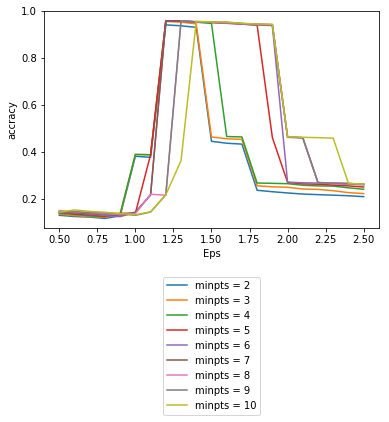

In [10]:
import matplotlib.pyplot as plt

for i in minpts_list:
    plt.plot(eps_list, [accuracy_dict[i,j][0] for j in eps_list], label = "minpts = "+str(i))

plt.xlabel('Eps')
plt.ylabel('accracy')

plt.legend(loc = 9, bbox_to_anchor = (0.5,-0.2))
plt.show()

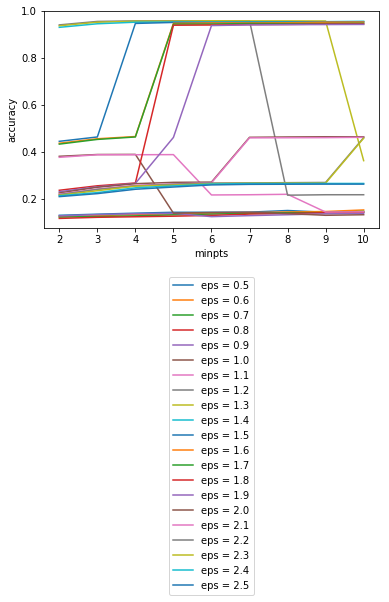

In [9]:
import matplotlib.pyplot as plt

for j in eps_list:
    plt.plot(minpts_list, [accuracy_dict[i,j][0] for i in minpts_list], label = "eps = "+str(j))

plt.xlabel('minpts')
plt.ylabel('accuracy')
plt.legend(loc = 9, bbox_to_anchor = (0.5,-0.2))
plt.show()

# Report

The above graphs give the variation of accuracy with the variation of epsilon (First graph) and minpts (Second Graph) for different values of the other variable.

The variation of accuracy with epsilon has a fixed trend that they are very low at the beginning and there is an increase to around 95% accuracy and then again decrease. For all values of minpts, the peak is almost always covering a value between 1.25 and 1.5.

But when the variation of accuracy with minpts is considered it is not in particuar trend.